<a href="https://colab.research.google.com/github/atriap/PIMA_Diabetes/blob/main/PIMA_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

In [ ]:
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

# Data Reading

In [ ]:
df = pd.read_csv('C:/Users/ASUS/Desktop/pima-indians-diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 767 rows and 9 columns


In [ ]:
#renaming column names for better understanding 
df.columns = ["pregnancies", "glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
df.info()
# It seems that data has no any null entry. However missing value can be encoded in number of different ways.
#skin_thickness equal to zero, glucose equal to zero.Here zero,for all intent and purposes, is a missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 767 non-null    int64  
 1   glucose                     767 non-null    int64  
 2   blood_pressure              767 non-null    int64  
 3   skin_thickness              767 non-null    int64  
 4   insulin                     767 non-null    int64  
 5   bmi                         767 non-null    float64
 6   Diabetes_Pedigree_Function  767 non-null    float64
 7   age                         767 non-null    int64  
 8   outcome                     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#handling missing data 
import numpy as np
df.glucose.replace(0,np.nan,inplace = True)
df.insulin.replace(0,np.nan,inplace = True)
df.blood_pressure.replace(0,np.nan,inplace = True)
df.bmi.replace(0,np.nan,inplace = True)
df.skin_thickness.replace(0,np.nan,inplace = True)
df.age.replace(0,np.nan,inplace = True)
df.Diabetes_Pedigree_Function.replace(0,np.nan,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 767 non-null    int64  
 1   glucose                     762 non-null    float64
 2   blood_pressure              732 non-null    float64
 3   skin_thickness              540 non-null    float64
 4   insulin                     394 non-null    float64
 5   bmi                         756 non-null    float64
 6   Diabetes_Pedigree_Function  767 non-null    float64
 7   age                         767 non-null    int64  
 8   outcome                     767 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [ ]:
#filling the NaN values with mean value, mainly targetting skin_thickness.
df = df.fillna(df.mean())
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32,1
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30,0


# Data Distribution Analysis

In [ ]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.440947,12.104231,8.794137,85.076586,6.879514,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.405738,29.142593,155.548223,32.400000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,155.548223,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='outcome', ylabel='Density'>

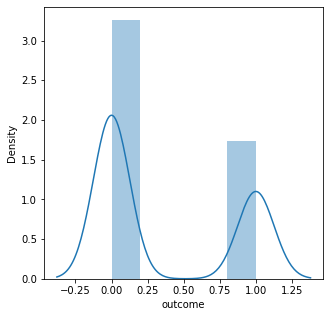

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
sns.distplot(df['outcome'])


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

<AxesSubplot:xlabel='bmi', ylabel='Density'>

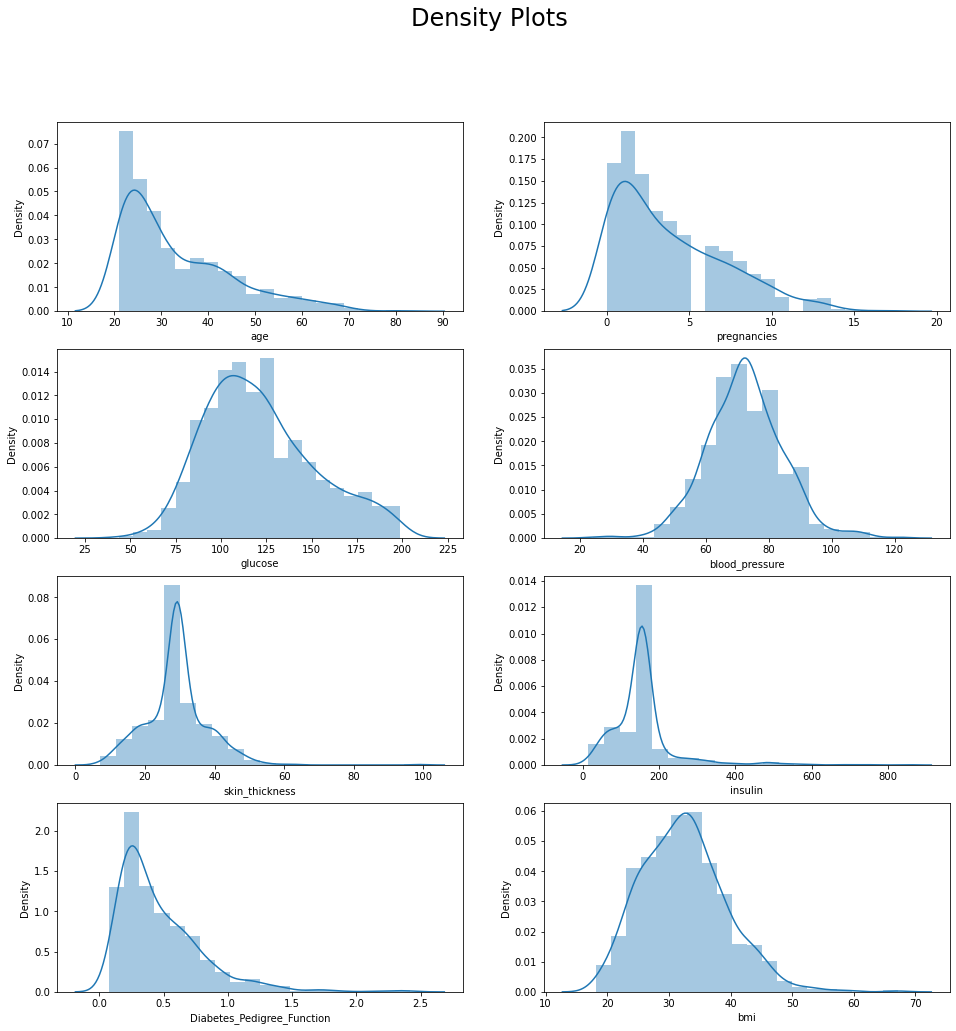

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
plt.suptitle('Density Plots',fontsize=24)
sns.distplot(df.age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.blood_pressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.skin_thickness, bins = 20, ax=ax[2,0])
sns.distplot(df.insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.Diabetes_Pedigree_Function, bins = 20, ax=ax[3,0]) 
sns.distplot(df.bmi, bins = 20, ax=ax[3,1]) 

<AxesSubplot:xlabel='outcome'>

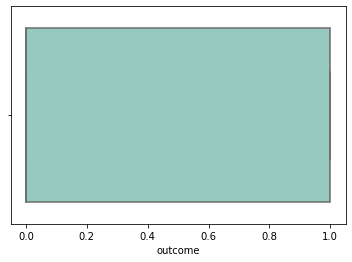

In [ ]:
sns.boxplot(x="outcome", data=df,palette='Set3')

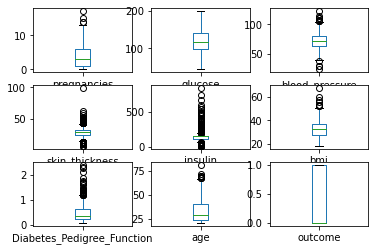

In [ ]:
# box and whisker plots

df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

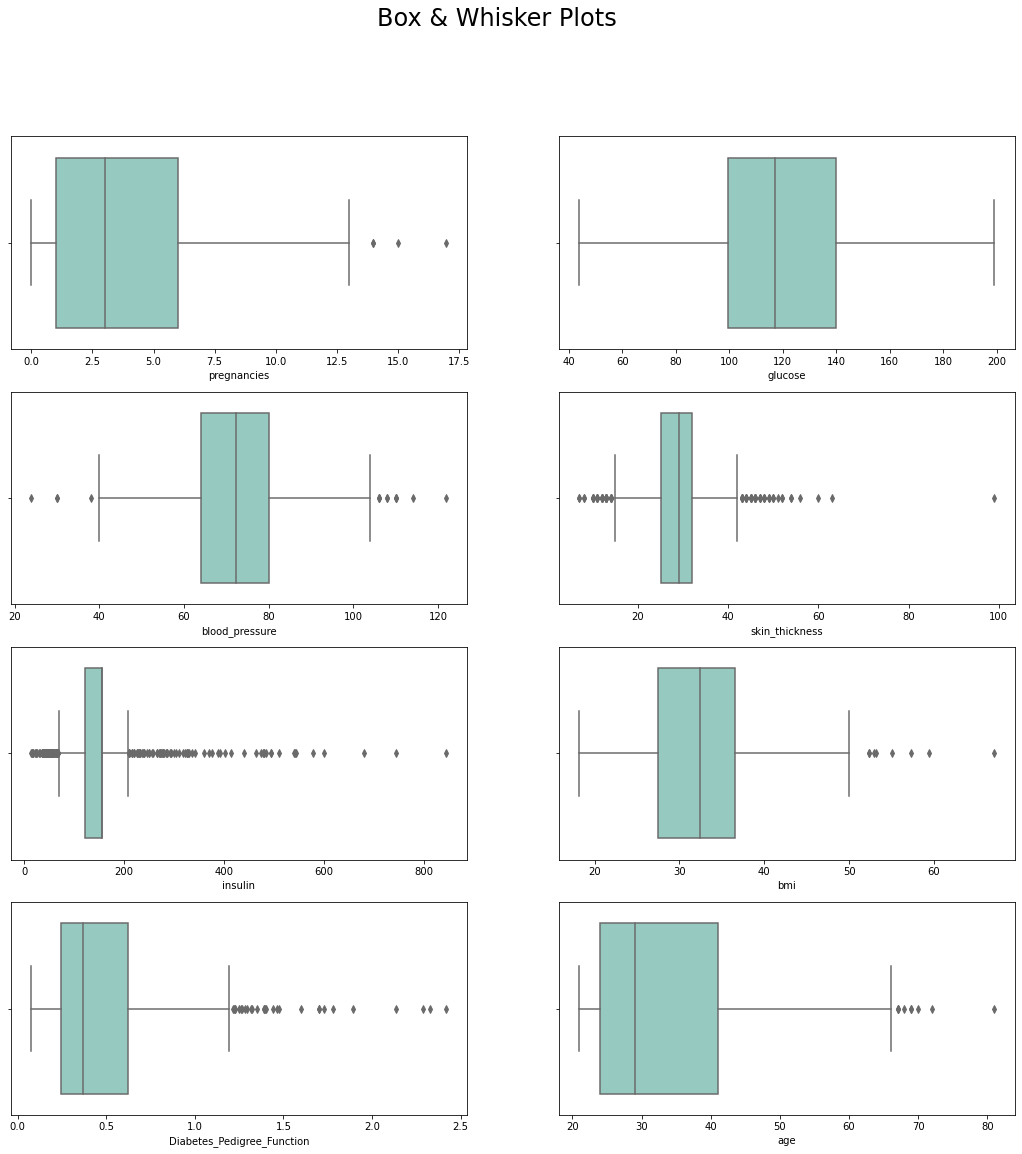

In [ ]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Box & Whisker Plots',fontsize=24)
sns.boxplot(x="pregnancies", data=df,ax=ax[0,0],palette='Set3')
sns.boxplot(x="glucose", data=df,ax=ax[0,1],palette='Set3')
sns.boxplot (x ='blood_pressure', data=df, ax=ax[1,0], palette='Set3')
sns.boxplot(x='skin_thickness', data=df, ax=ax[1,1],palette='Set3')
sns.boxplot(x='insulin', data=df, ax=ax[2,0], palette='Set3')
sns.boxplot(x='bmi', data=df, ax=ax[2,1],palette='Set3')
sns.boxplot(x='Diabetes_Pedigree_Function', data=df, ax=ax[3,0],palette='Set3')
sns.boxplot(x='age', data=df, ax=ax[3,1],palette='Set3')
plt.show()

# Correlation between Variables

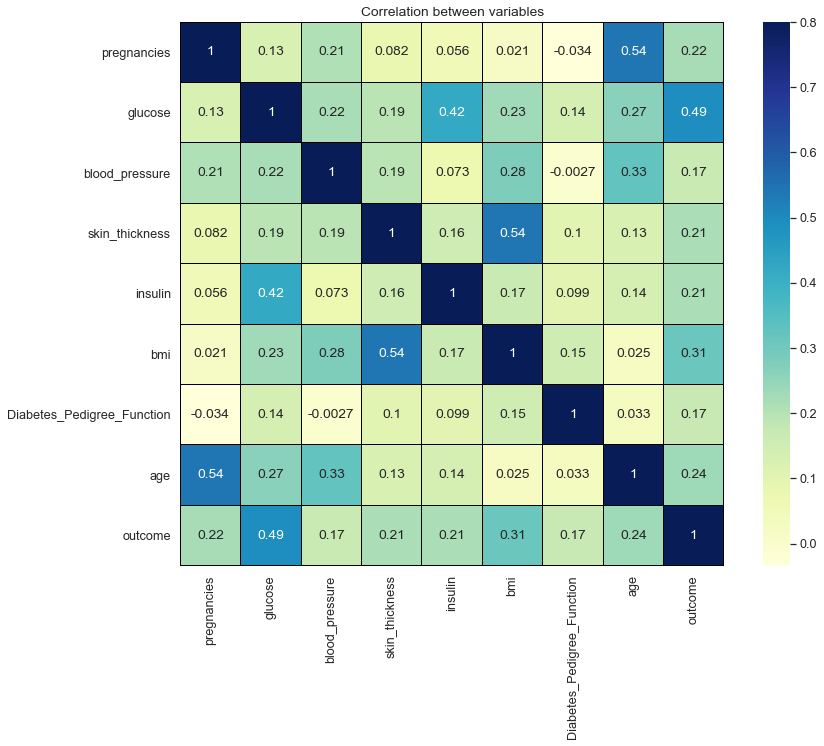

In [ ]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between variables');

# Pearson Correlation Matrix

In [ ]:
features = df.iloc[:,3:].columns.tolist()
target = df.iloc[:,1].name
correlations = {}
for f in features:
    data_temp = df[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
    pass
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
outcome vs glucose,0.492225
insulin vs glucose,0.420365
age vs glucose,0.265409
bmi vs glucose,0.230872
skin_thickness vs glucose,0.192368
Diabetes_Pedigree_Function vs glucose,0.136620


<AxesSubplot:title={'center':'Pearson Correlation of variables'}>

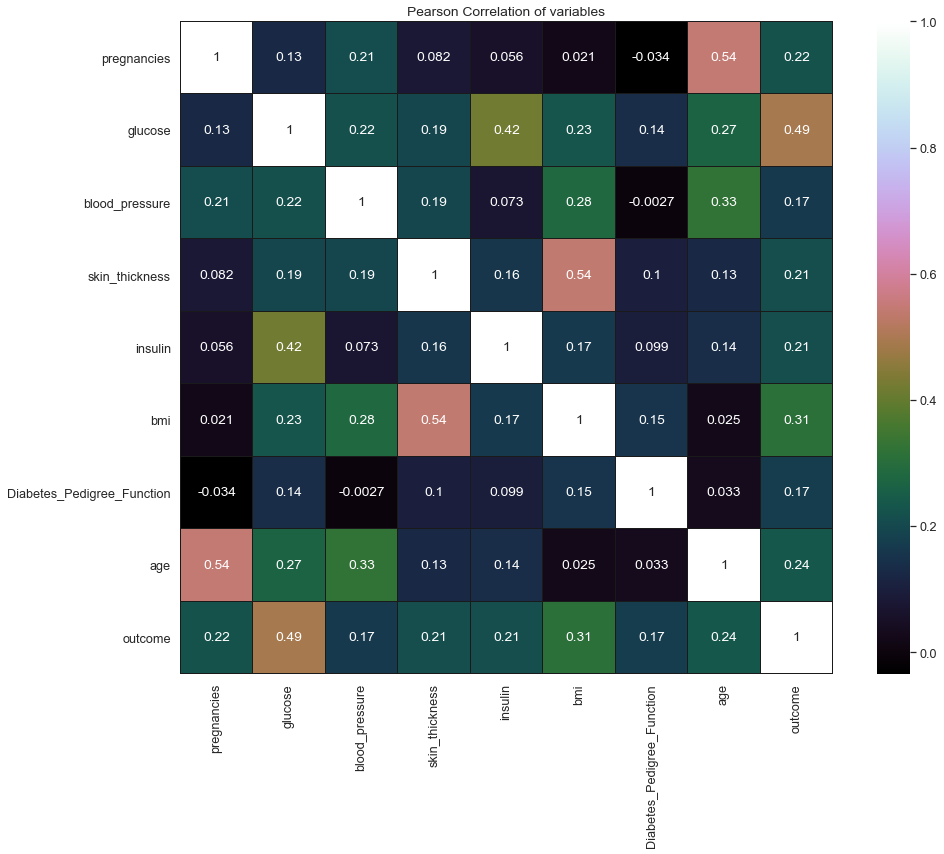

In [ ]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
df_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of variables')
# Draw the heatmap using seaborn
#sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

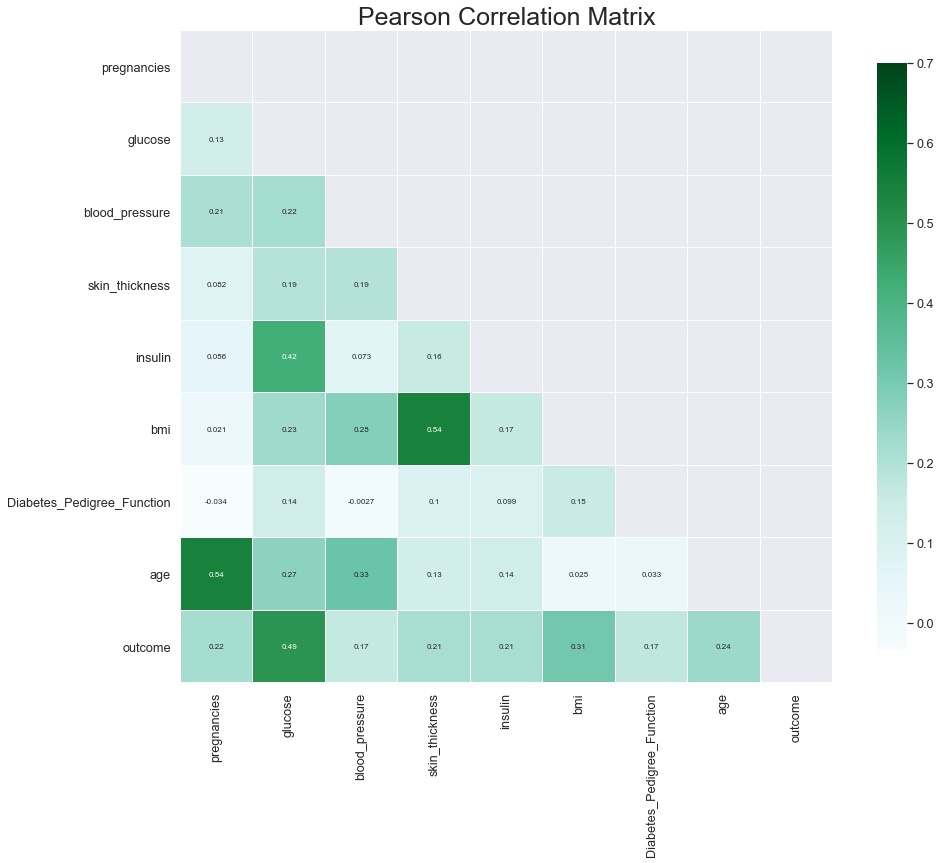

In [ ]:
features = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness','insulin','bmi','Diabetes_Pedigree_Function','age','outcome']
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# Data Reduction using PCA

In [ ]:
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Some global variables
num_classes = 1
num_features = 8
num_reduce = 7
epochs = 200
eig_vec = []

In [ ]:
array = df.values
X = array[:,0:8]
Y = array[:,8]
pca = PCA(n_components = 5)
fit = pca.fit(X)
print(("Explained Variance: %s") % (fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [0.86523286 0.08903015 0.02039459 0.01230788 0.00926079]
[[ 2.50854835e-03  1.65735124e-01  1.21692763e-02  1.71645896e-02
   9.85620754e-01  1.42263212e-02  4.01580158e-04  2.07856153e-02]
 [ 1.81932247e-02  9.68280438e-01  1.18672789e-01  5.18053036e-02
  -1.68484103e-01  4.89838966e-02  1.19317248e-03  1.20611941e-01]
 [ 1.06311249e-01 -1.82985965e-01  7.36767596e-01  1.88437822e-01
   3.62158329e-03  1.26993718e-01 -4.45837797e-04  6.00614712e-01]
 [-1.12760661e-01 -1.75092946e-03  4.38159843e-01  3.87269818e-01
  -1.71117612e-03  3.63441584e-01  1.34202147e-03 -7.16397581e-01]
 [ 4.53712727e-02 -3.45666229e-02 -4.89235526e-01  7.52463533e-01
  -1.20567617e-02  3.40939578e-01  3.74613061e-03  2.73486074e-01]]


# Decision Tree Classifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Accuracy  70.83333333333334


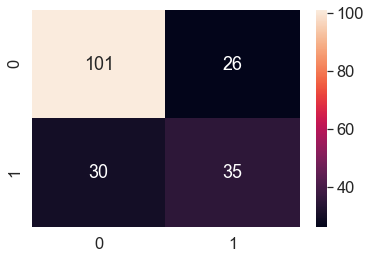

In [ ]:
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [ ]:
X=df.drop(['outcome'], axis=1)
X

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
763,2,122.0,70.0,27.000000,155.548223,36.8,0.340,27
764,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
765,1,126.0,60.0,29.142593,155.548223,30.1,0.349,47


In [ ]:
y=df.outcome
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: outcome, Length: 767, dtype: int64

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

Evaluation using After Separating Independent and Dependent Variables

Accuracy  71.35416666666666


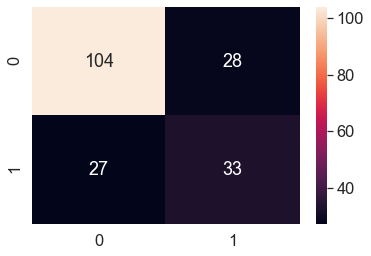

In [ ]:
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

# Decision Tree Visualization

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
pip install graphviz

In [ ]:
import graphviz

In [ ]:
features=X.columns
features

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'Diabetes_Pedigree_Function', 'age'],
      dtype='object')

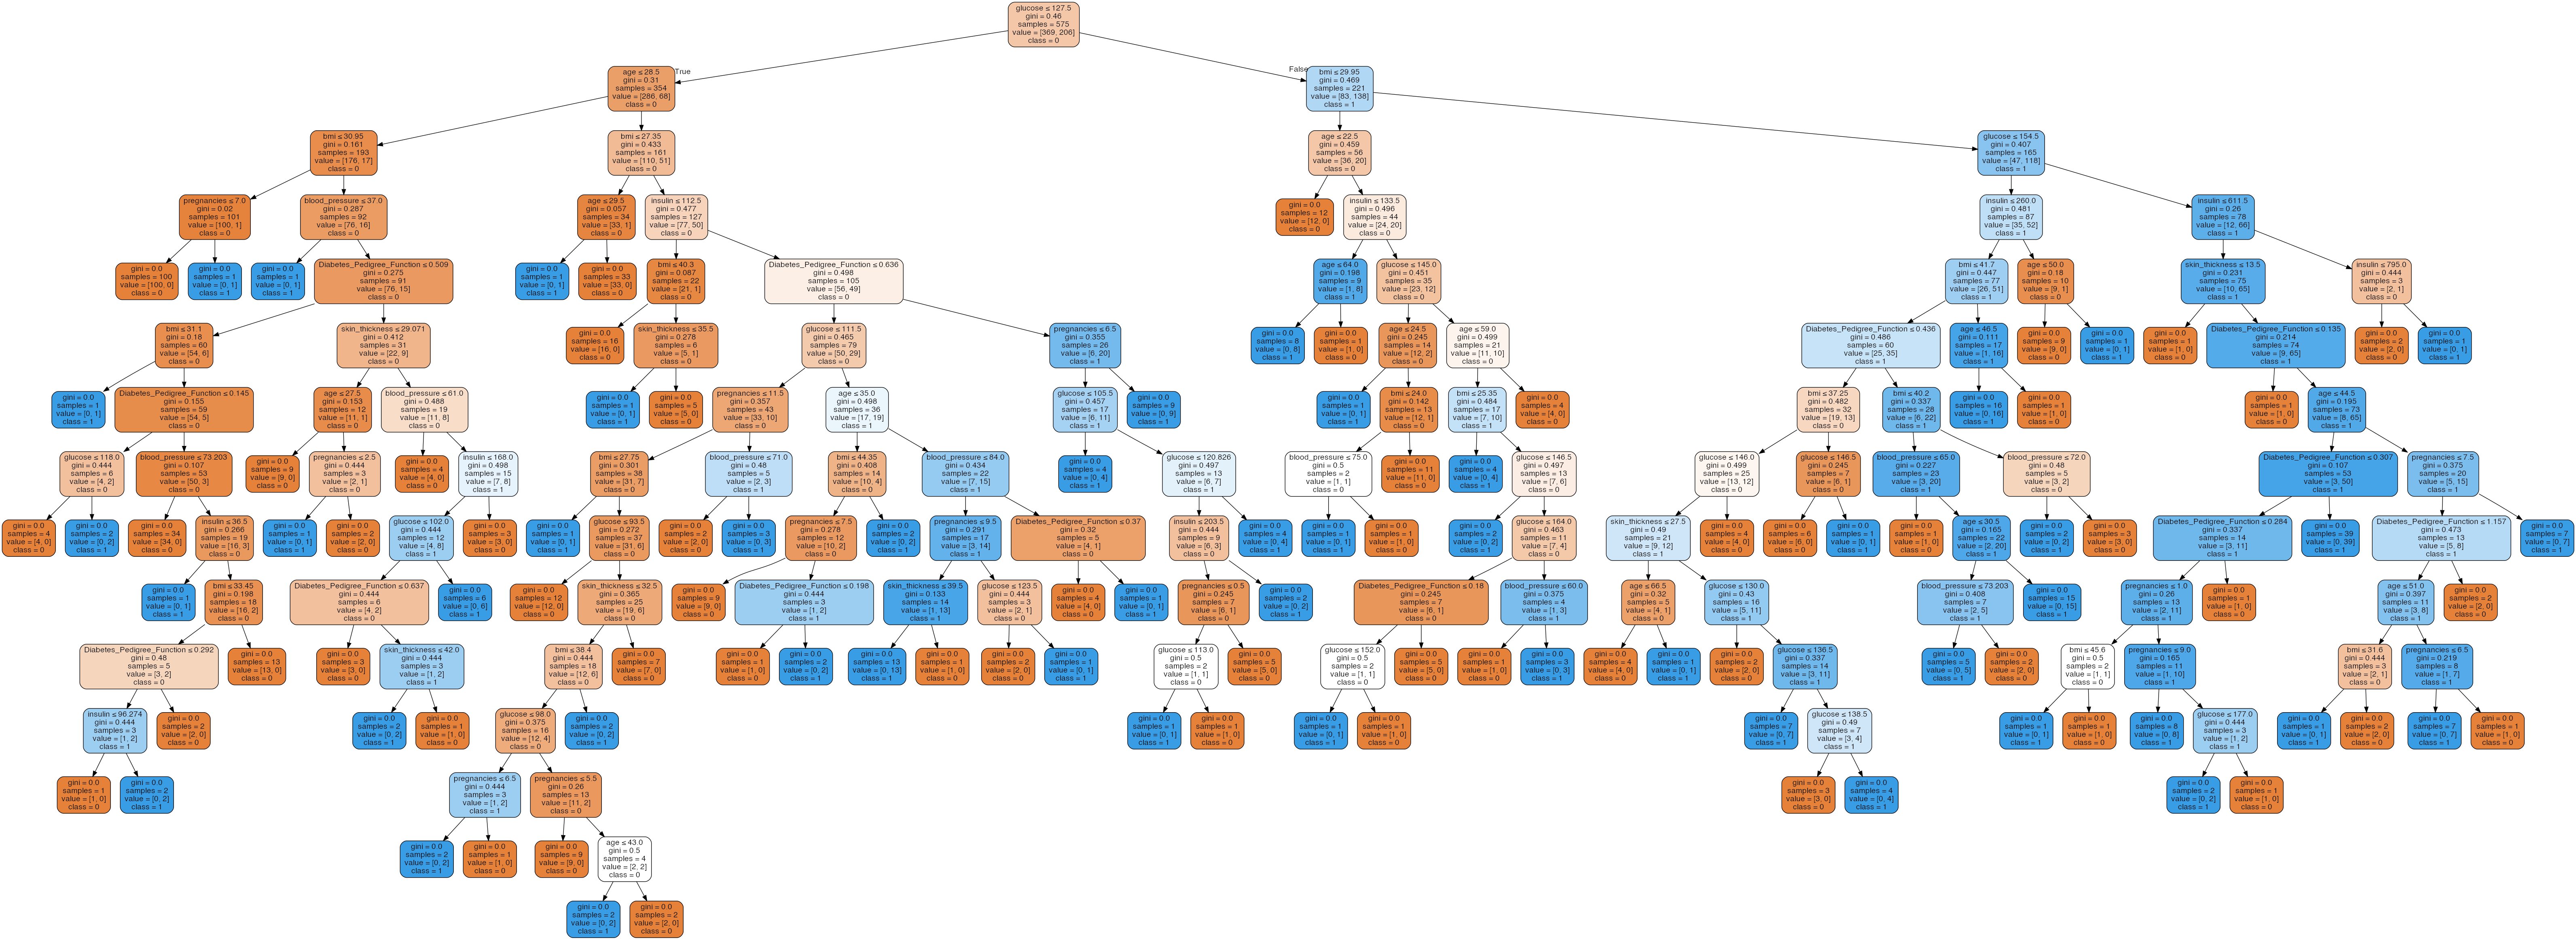

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

Accuracy  78.64583333333334


Better Decision Tree Visualisation

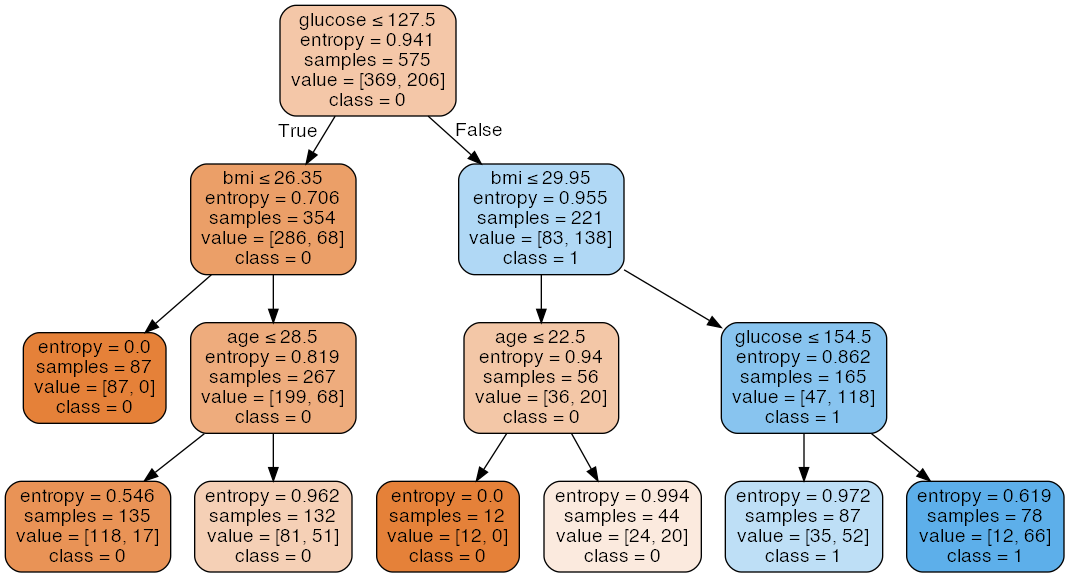

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())